In [1]:
from web3 import Web3
from ens import ENS
import json
import requests
from IPython.display import Image

In [2]:
infura_url= 'https://mainnet.infura.io/v3/[YOUR INFURA API KEY]'
web3= Web3(Web3.HTTPProvider (infura_url))
ns = ENS.fromWeb3(web3)
web3.isConnected()

True

In [3]:
sc_address="0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"
with open ("./ba_abi.json") as f:
    abi= json.load (f)

In [4]:
baContract = web3.eth.contract(address=sc_address, abi=abi)

In [5]:
print ("The owner of APE 6633: ", baContract.functions.ownerOf(6633).call())

The owner of APE 6633:  0xC4505dB8CC490767fA6f4b6f0F2bDd668B357A5D


In [6]:
url= "https://api.covalenthq.com/v1/1/address/0xC4505dB8CC490767fA6f4b6f0F2bDd668B357A5D/transactions_v2/?quote-currency=USD&format=JSON&block-signed-at-asc=false&no-logs=false&page-size=1000&page-number=8&key=[YOUR API KEY]"
response= requests.get (url)
data= response.json()

In [7]:
for element in data['data']['items']:
    if element['to_address'] == '0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d' and element ["log_events"][0]["decoded"]["params"][2]["value"] == '6633':
        print (element)
        break
else:
    print ('keep looking')

{'block_signed_at': '2022-01-20T23:21:01Z', 'block_height': 14045417, 'tx_hash': '0x055ff0db37439fb3d6d92509db2e5805bc0d65e4e746838ec210771c899ccc74', 'tx_offset': 307, 'successful': True, 'from_address': '0xb4c27f85d7659e0cf72f479693c564e61472cb57', 'from_address_label': None, 'to_address': '0xbc4ca0eda7647a8ab7c2061c2e118a18a936f13d', 'to_address_label': None, 'value': '0', 'value_quote': 0.0, 'gas_offered': 134399, 'gas_spent': 124799, 'gas_price': 227296063064, 'fees_paid': '28366321374324136', 'gas_quote': 87.48932532550214, 'gas_quote_rate': 3084.267578125, 'log_events': [{'block_signed_at': '2022-01-20T23:21:01Z', 'block_height': 14045417, 'tx_offset': 307, 'log_offset': 561, 'tx_hash': '0x055ff0db37439fb3d6d92509db2e5805bc0d65e4e746838ec210771c899ccc74', 'raw_log_topics': ['0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c4a11628f55a4df523b3ef', '0x000000000000000000000000b4c27f85d7659e0cf72f479693c564e61472cb57', '0x000000000000000000000000c4505db8cc490767fa6f4b6f0f2bdd668b357a5d'

# Royalties

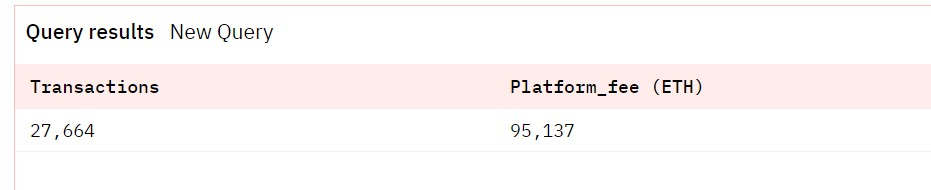

In [8]:
Image(filename='dune_fees_table.jpg') 

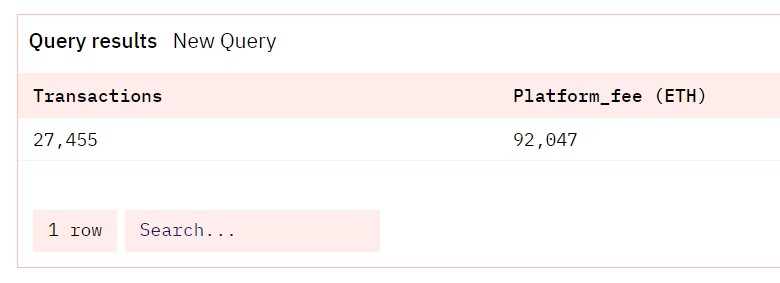

In [9]:
Image(filename='dune_trades_table.jpg') 

## Floor price

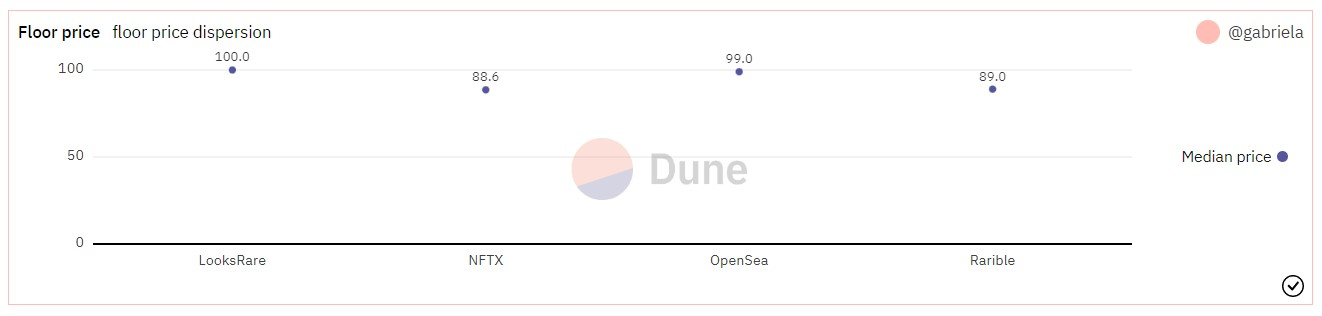

In [10]:
Image(filename='dune_floor_price.jpg') 

### Chainlink

In [3]:
abi='[{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"},{"internalType":"address","name":"_accessController","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"int256","name":"current","type":"int256"},{"indexed":true,"internalType":"uint256","name":"roundId","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"updatedAt","type":"uint256"}],"name":"AnswerUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"uint256","name":"roundId","type":"uint256"},{"indexed":true,"internalType":"address","name":"startedBy","type":"address"},{"indexed":false,"internalType":"uint256","name":"startedAt","type":"uint256"}],"name":"NewRound","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"OwnershipTransferRequested","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"inputs":[],"name":"acceptOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"accessController","outputs":[{"internalType":"contract AccessControllerInterface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"aggregator","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"}],"name":"confirmAggregator","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_roundId","type":"uint256"}],"name":"getAnswer","outputs":[{"internalType":"int256","name":"","type":"int256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_roundId","type":"uint256"}],"name":"getTimestamp","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestAnswer","outputs":[{"internalType":"int256","name":"","type":"int256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRound","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestTimestamp","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint16","name":"","type":"uint16"}],"name":"phaseAggregators","outputs":[{"internalType":"contract AggregatorV2V3Interface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"phaseId","outputs":[{"internalType":"uint16","name":"","type":"uint16"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"}],"name":"proposeAggregator","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"proposedAggregator","outputs":[{"internalType":"contract AggregatorV2V3Interface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"proposedGetRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"proposedLatestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_accessController","type":"address"}],"name":"setController","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"}],"name":"transferOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
addr = web3.toChecksumAddress('0x352f2Bc3039429fC2fe62004a1575aE74001CfcE')
contract = web3.eth.contract(address=addr, abi=abi)

In [12]:
contract.all_functions()

[<Function acceptOwnership()>,
 <Function accessController()>,
 <Function aggregator()>,
 <Function confirmAggregator(address)>,
 <Function decimals()>,
 <Function description()>,
 <Function getAnswer(uint256)>,
 <Function getRoundData(uint80)>,
 <Function getTimestamp(uint256)>,
 <Function latestAnswer()>,
 <Function latestRound()>,
 <Function latestRoundData()>,
 <Function latestTimestamp()>,
 <Function owner()>,
 <Function phaseAggregators(uint16)>,
 <Function phaseId()>,
 <Function proposeAggregator(address)>,
 <Function proposedAggregator()>,
 <Function proposedGetRoundData(uint80)>,
 <Function proposedLatestRoundData()>,
 <Function setController(address)>,
 <Function transferOwnership(address)>,
 <Function version()>]

In [6]:
latestData = contract.functions.latestRoundData().call()
latestData[1]

68600000000000000000

In [4]:
decimal=contract.functions.decimals().call()
decimal

18

In [7]:
latestData[1]*10**-decimal

68.60000000000001